# Oasis_task_4

Name : Pooja Singh

Domain  : Data Science

Project : EMAIL SPAM DETECTION WITH MACHINE LEARNING

## Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [44]:
email_data=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [45]:
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
email_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## Analysing Data

In [47]:
email_data.shape

(5572, 5)

In [48]:
email_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [50]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
email_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


######  Finding Null values

In [52]:
email_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#####  Droping  columns with most null values

In [53]:
email_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [54]:
email_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##### Finding duplicated values

In [55]:
email_data.duplicated().sum()

403

In [56]:
email_data.drop_duplicates(inplace=True)

#####  Renaming columns

In [57]:
email_data.columns=['Labels','E-mails']

In [58]:
email_data.head()

,Labels,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Analysing by plots

([<matplotlib.patches.Wedge at 0x1f4f0826590>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

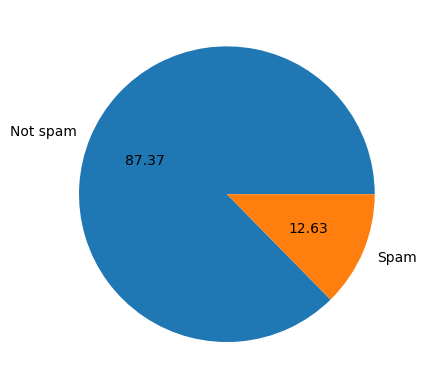

In [59]:
plt.pie(email_data['Labels'].value_counts(),labels=['Not spam','Spam'],autopct='%0.2f')

# Training model

#### Importing Libraries

In [60]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

### Performing encoding

In [61]:
encode=LabelEncoder()
email_data['Labels']=encode.fit_transform(email_data['Labels'])
email_data['Labels']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5169, dtype: int32

#### Seperating input and output data

In [62]:
x=email_data['E-mails']
y=email_data['Labels']

In [63]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: E-mails, Length: 5169, dtype: object


In [64]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Labels, Length: 5169, dtype: int32

#### Spliting train and test data

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=20)

In [66]:
len(x_train)

3101

In [67]:
len(x_test)

2068

In [68]:
len(y_train)

3101

In [69]:
len(y_test)

2068

#### Persorming transformation

In [70]:
features=TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')

In [71]:
x_train_f=features.fit_transform(x_train,y_train)

In [72]:
x_test_f=features.transform(x_test)

### Model training

In [73]:
model=LogisticRegression()

In [74]:
model.fit(x_train_f,y_train)

LogisticRegression()

In [75]:
predicted=model.predict(x_test_f)

In [76]:
print(predicted)

[0 0 1 ... 0 0 0]


### Evaluating model

In [77]:
score=mean_squared_error(predicted,y_test)
score

0.047872340425531915

### Making predictions

In [78]:
input_sen=str(input("Enter your mail : "))
input_str=[input_sen]
featuresi=features.transform(input_str)
output=model.predict(featuresi)
if output[0]==0:
    print("Email is not spam.")
else:
    print("Email is spam.")

Enter your mail : hii how are you..??
Email is not spam.
